In [3]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [4]:
# データセットを読み込み
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()                   # インスタンスを生成

In [5]:
# Pandasのデータフレームに変換
# (変数のarrya, 変数名を並べたリスト)
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 単回帰

In [6]:
X = df.loc[:, ['LSTAT']].values
y = df.loc[:, ['MEDV']].values

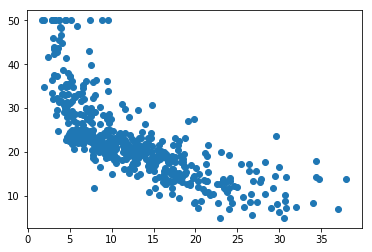

In [7]:
# 散布図を出力
# 直線的な関係が確認できる
import matplotlib.pyplot as plt
% matplotlib inline             
plt.scatter(X, y)                   # 散布図を表示
plt.show()                          # 指定した内容でグラフを出力

In [8]:
# 線形回帰モデルのクラスを読み込み
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
lr = LinearRegression()

# 単回帰モデルを学習
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print('train: %.3f' % lr.score(X, y))

train: 0.544


In [10]:
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(lr, X, y, cv=kf_3)

# 交差検証精度の平均を出力
print("mean-score:{}".format(scores_3.mean()))

# 交差検証精度の標準偏差を出力
print("標準偏差:{}".format(scores_3.std()))

mean-score:0.5359257181816985
標準偏差:0.061460304755239364


# 重回帰

In [11]:
X = df.loc[:, ['LSTAT', 'RM']].values
y = df.loc[:, ['MEDV']].values

In [12]:
# ホールド・アウト法によるデータの分割
# (X, y, テストにどの割合を割くか, 分割のしかたを決める乱数生成器)
# テストデータの割合は、test_size引数に指定することで変更可能です（今回は、train:test = 7:3）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [13]:
# 重回帰の線形回帰を実行
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [14]:
# 重回帰線形モデルの学習
# trainデータのみを用いていることに注意
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [16]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %3f' % adjusted(lr.score(X_train, y_train), len(y_train), 2))
print('test : %3f' % adjusted(lr.score(X_test, y_test), len(y_test), 2))

adjusted R^2
train: 0.648955
test : 0.601704


In [25]:
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(lr, X, y, cv=kf_3)

# 交差検証精度の平均を出力
print("mean-score:{}".format(scores_3.mean()))

# 交差検証精度の標準偏差を出力
print("標準偏差:{}".format(scores_3.std()))

mean-score:0.6232497111077301
標準偏差:0.08335109518518222


# 多項式回帰(2次関数)

In [26]:
X = df.loc[:, ['LSTAT', 'RM']].values
y = df.loc[:, ['MEDV']].values

# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)    # 2次の多項式基底を生成
lstat_quad = quad.fit_transform(X) # 生成した基底関数で変数変換を実行
lstat_quad

array([[ 1.      ,  4.98    ,  6.575   , 24.8004  , 32.7435  , 43.230625],
       [ 1.      ,  9.14    ,  6.421   , 83.5396  , 58.68794 , 41.229241],
       [ 1.      ,  4.03    ,  7.185   , 16.2409  , 28.95555 , 51.624225],
       ...,
       [ 1.      ,  5.64    ,  6.976   , 31.8096  , 39.34464 , 48.664576],
       [ 1.      ,  6.48    ,  6.794   , 41.9904  , 44.02512 , 46.158436],
       [ 1.      ,  7.88    ,  6.03    , 62.0944  , 47.5164  , 36.3609  ]])

In [27]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

lstat_quad_train, lstat_quad_test, _, _ = train_test_split(lstat_quad, y, test_size = 0.3, random_state = 0)

In [28]:
from sklearn.linear_model import LinearRegression

# 線形回帰のインスタンスを生成
model_quad = LinearRegression()

# 変換後の変数を利用して実行
model_quad.fit(lstat_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# 自由度調整済み決定係数を出力
print('adjusted R^2')
print('train: %.3f' % adjusted(model_quad.score(lstat_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_quad.score(lstat_quad_test, y_test), len(y_test), 2))
print('')

adjusted R^2
train: 0.772
test : 0.710



In [30]:
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(model_quad, X, y, cv=kf_3)

# 交差検証精度の平均を出力
print("mean-score:{}".format(scores_3.mean()))

# 交差検証精度の標準偏差を出力
print("標準偏差:{}".format(scores_3.std()))

mean-score:0.6232497111077301
標準偏差:0.08335109518518222


# 多項式（3次関数）

In [31]:
X = df.loc[:, ['LSTAT', 'RM']].values
y = df.loc[:, ['MEDV']].values

# 3次関数の変数変換
cubic = PolynomialFeatures(degree=3)     # 3次の多項式規定を生成
lstat_cubic = cubic.fit_transform(X) # 生成した基底関数で変数変換を実行
lstat_cubic

array([[  1.        ,   4.98      ,   6.575     , ..., 163.06263   ,
        215.2885125 , 284.24135938],
       [  1.        ,   9.14      ,   6.421     , ..., 536.4077716 ,
        376.83526274, 264.73295646],
       [  1.        ,   4.03      ,   7.185     , ..., 116.6908665 ,
        208.04562675, 370.92005662],
       ...,
       [  1.        ,   5.64      ,   6.976     , ..., 221.9037696 ,
        274.46820864, 339.48408218],
       [  1.        ,   6.48      ,   6.794     , ..., 285.2827776 ,
        299.10666528, 313.60041418],
       [  1.        ,   7.88      ,   6.03      , ..., 374.429232  ,
        286.523892  , 219.256227  ]])

In [32]:
# ホールド・アウト法による分割
lstat_cubic_train, lstat_cubic_test, _, _ = train_test_split(lstat_cubic, y, test_size = 0.3, random_state = 0)

In [33]:
# 線形回帰のインスタンスを生成
model_cubic = LinearRegression()

# 変換後の変数を利用して実行
model_cubic.fit(lstat_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print('train: %.3f' % adjusted(model_cubic.score(lstat_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic.score(lstat_cubic_test, y_test), len(y_test), 3))

train: 0.790
test : 0.704


In [40]:
from sklearn.model_selection import KFold
kf_3 = KFold(n_splits=5, shuffle=True, random_state=0)

# 交差検証を実行
# (モデル, 説明変数, 目的変数, 分割の方法)
from sklearn.model_selection import cross_val_score
scores_3 = cross_val_score(model_cubic, lstat_cubic_train, y_train, cv=kf_3)

# 交差検証精度の平均を出力
print("mean-score:{}".format(scores_3.mean()))

# 交差検証精度の標準偏差を出力
print("標準偏差:{}".format(scores_3.std()))

mean-score:0.5484014317123208
標準偏差:0.40787277969172603
